In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from wordcloud import WordCloud

In [30]:
# Veriyi yükle
df_veri = pd.read_csv('mission_launches.csv')

In [51]:
# NaN değer içeren satırları düşür
df_veri.dropna(inplace=True)

In [54]:
# Tanımlayıcı İstatistikler
print("df_veri'nin Şekli:", df_veri.shape)
print("Sütunlar:", df_veri.columns)
print("NaN Değerleri:", df_veri.isnull().any().any())
print("Yinelenenler:", df_veri.duplicated().sum())

df_veri'nin Şekli: (949, 10)
Sütunlar: Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status', 'Ülke'],
      dtype='object')
NaN Değerleri: False
Yinelenenler: 0


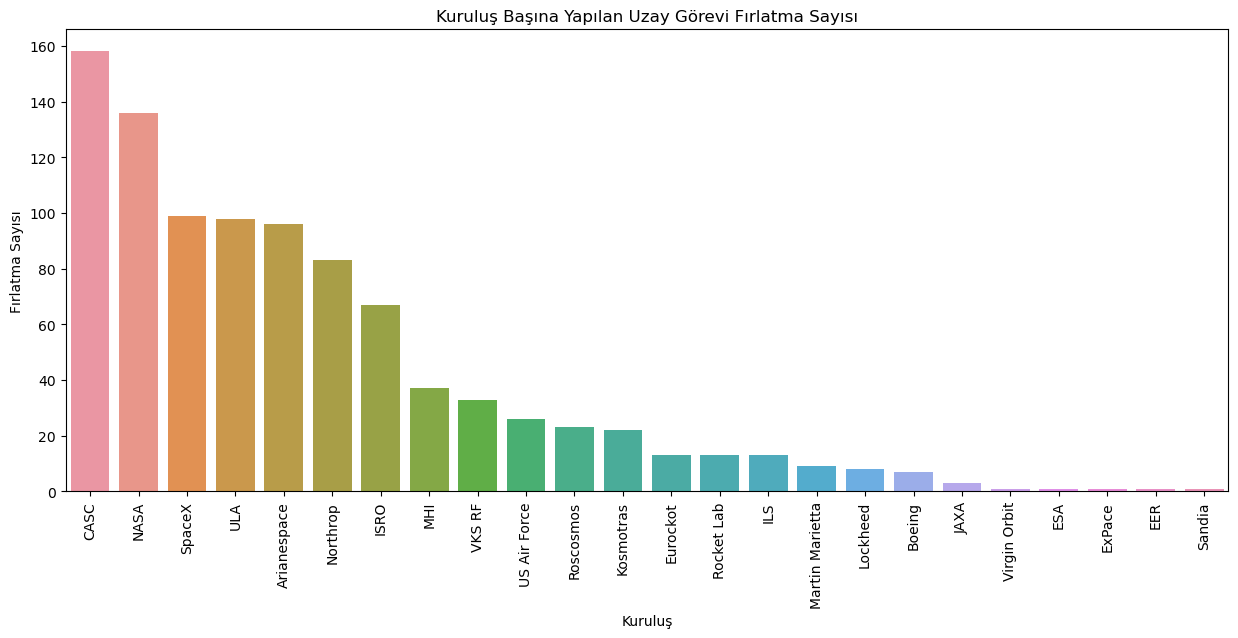

In [55]:
# Şirket Başına Yapılan Fırlatma Sayısı
fırlatmalar_sirket = df_veri['Organisation'].value_counts()

plt.figure(figsize=(15, 6))
sns.barplot(x=fırlatmalar_sirket.index, y=fırlatmalar_sirket.values)
plt.xticks(rotation=90)
plt.title('Kuruluş Başına Yapılan Uzay Görevi Fırlatma Sayısı')
plt.xlabel('Kuruluş')
plt.ylabel('Fırlatma Sayısı')
plt.show()

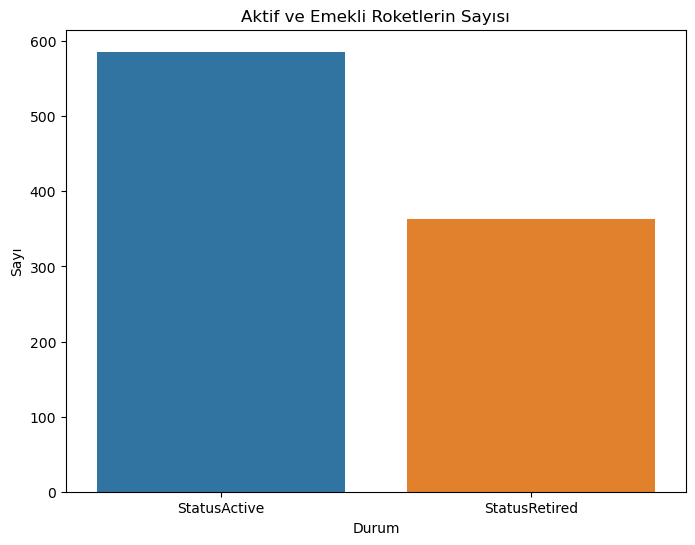

In [56]:
# Aktif ve Emekli Roketlerin Sayısı
aktif_vs_emekli = df_veri['Rocket_Status'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=aktif_vs_emekli.index, y=aktif_vs_emekli.values)
plt.title('Aktif ve Emekli Roketlerin Sayısı')
plt.xlabel('Durum')
plt.ylabel('Sayı')
plt.show()

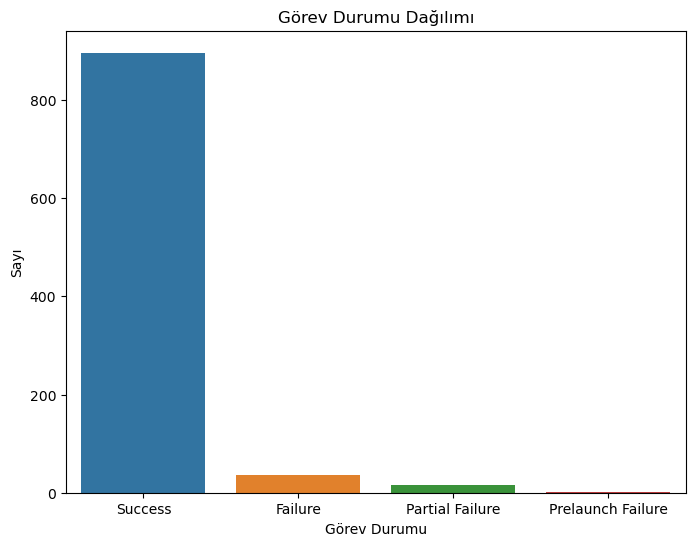

In [57]:
# Görev Durumu Dağılımı
gorev_durumu_dagilimi = df_veri['Mission_Status'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=gorev_durumu_dagilimi.index, y=gorev_durumu_dagilimi.values)
plt.title('Görev Durumu Dağılımı')
plt.xlabel('Görev Durumu')
plt.ylabel('Sayı')
plt.show()

C:\Users\ibrra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



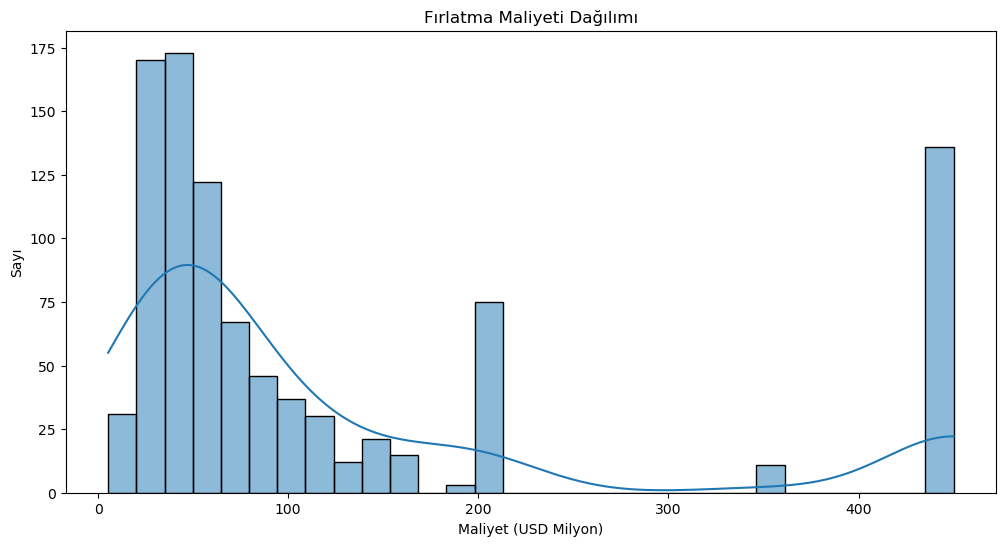

In [58]:
# Fırlatmalar Ne Kadar Maliyetli?
plt.figure(figsize=(12, 6))
sns.histplot(df_veri['Price'], bins=30, kde=True)
plt.title('Fırlatma Maliyeti Dağılımı')
plt.xlabel('Maliyet (USD Milyon)')
plt.ylabel('Sayı')
plt.show()

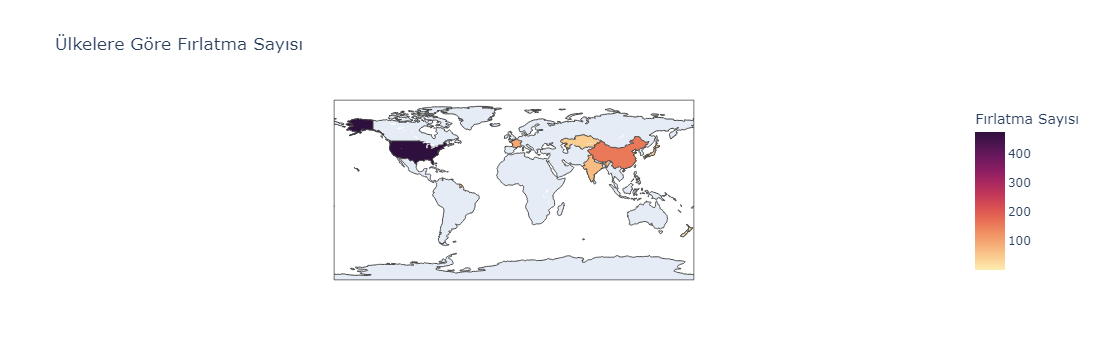

In [59]:
# Ülkelere Göre Fırlatma Sayısını Gösteren Bir Choropleth Haritası Kullanın
df_veri['Ülke'] = df_veri['Location'].apply(lambda x: x.split(',')[-1].strip())
df_veri['Ülke'] = df_veri['Ülke'].replace({
    'Russia': 'Rusya Federasyonu',
    'New Mexico': 'ABD',
    'Yellow Sea': 'Çin',
    'Shahrud Missile Test Site': 'İran',
    'Pacific Missile Range Facility': 'ABD',
    'Barents Sea': 'Rusya Federasyonu',
    'Gran Canaria': 'ABD'
})

fırlatmalar_ülke = df_veri['Ülke'].value_counts().reset_index()
fırlatmalar_ülke.columns = ['Ülke', 'Fırlatma Sayısı']

fig = px.choropleth(fırlatmalar_ülke,
                    locations='Ülke',
                    locationmode='country names',
                    color='Fırlatma Sayısı',
                    color_continuous_scale='matter',
                    title='Ülkelere Göre Fırlatma Sayısı')
fig.show()

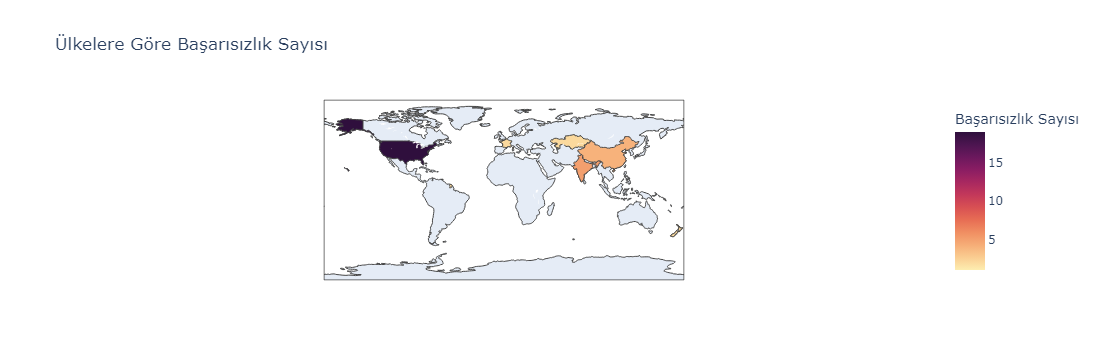

In [60]:
# Bir Choropleth Haritası Kullanarak Ülkelere Göre Başarısızlık Sayısını Gösterin
başarısızlık_ülke = df_veri[df_veri['Mission_Status'] == 'Failure']['Ülke'].value_counts().reset_index()
başarısızlık_ülke.columns = ['Ülke', 'Başarısızlık Sayısı']

fig_başarısızlık = px.choropleth(başarısızlık_ülke,
                                  locations='Ülke',
                                  locationmode='country names',
                                  color='Başarısızlık Sayısı',
                                  color_continuous_scale='matter',
                                  title='Ülkelere Göre Başarısızlık Sayısı')
fig_başarısızlık.show()

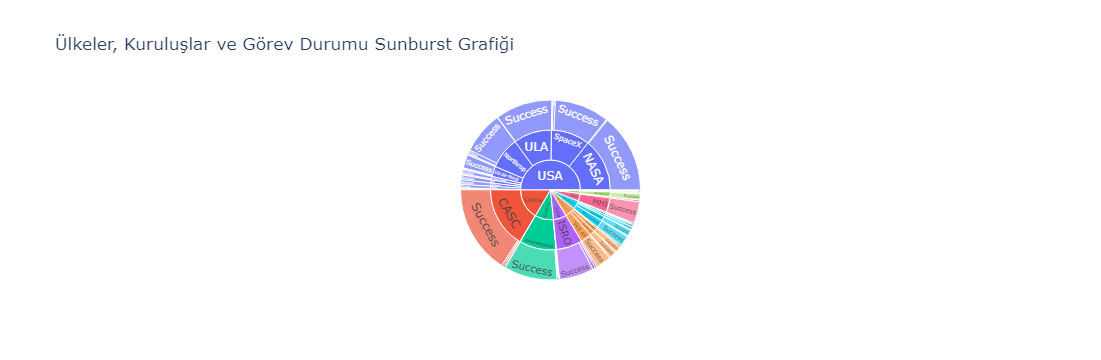

In [61]:
# Ülkeler, kuruluşlar ve görev durumu üzerine bir Plotly Sunburst Grafiği oluşturun.
fig_sunburst = px.sunburst(df_veri, path=['Ülke', 'Organisation', 'Mission_Status'],
                           title='Ülkeler, Kuruluşlar ve Görev Durumu Sunburst Grafiği')
fig_sunburst.show()

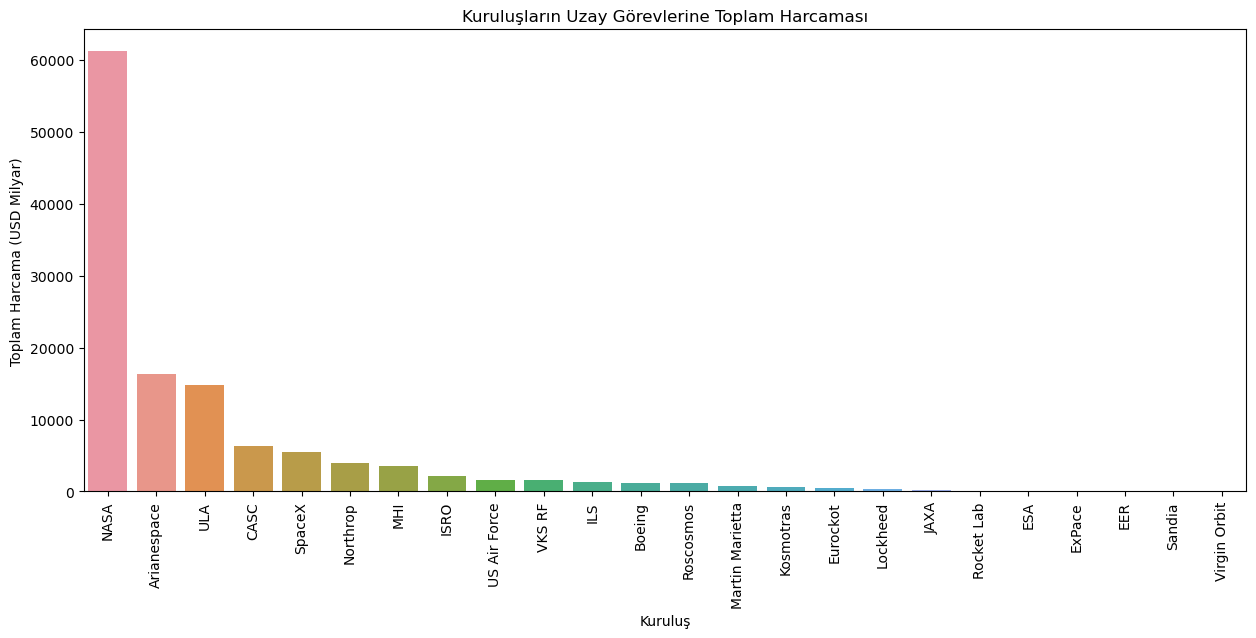

In [62]:
# 'Price' sütununu sayısal bir formata dönüştürme
df_veri['Price'] = pd.to_numeric(df_veri['Price'], errors='coerce')

# Kuruluşların Uzay Görevlerine Ne Kadar Para Harcadığını Analiz Edin
toplam_harcama = df_veri.groupby('Organisation')['Price'].sum().sort_values(ascending=False).reset_index()
toplam_harcama.columns = ['Kuruluş', 'Toplam Harcama (USD Milyar)']

plt.figure(figsize=(15, 6))
sns.barplot(x='Kuruluş', y='Toplam Harcama (USD Milyar)', data=toplam_harcama)
plt.xticks(rotation=90)
plt.title('Kuruluşların Uzay Görevlerine Toplam Harcaması')
plt.xlabel('Kuruluş')
plt.ylabel('Toplam Harcama (USD Milyar)')
plt.show()

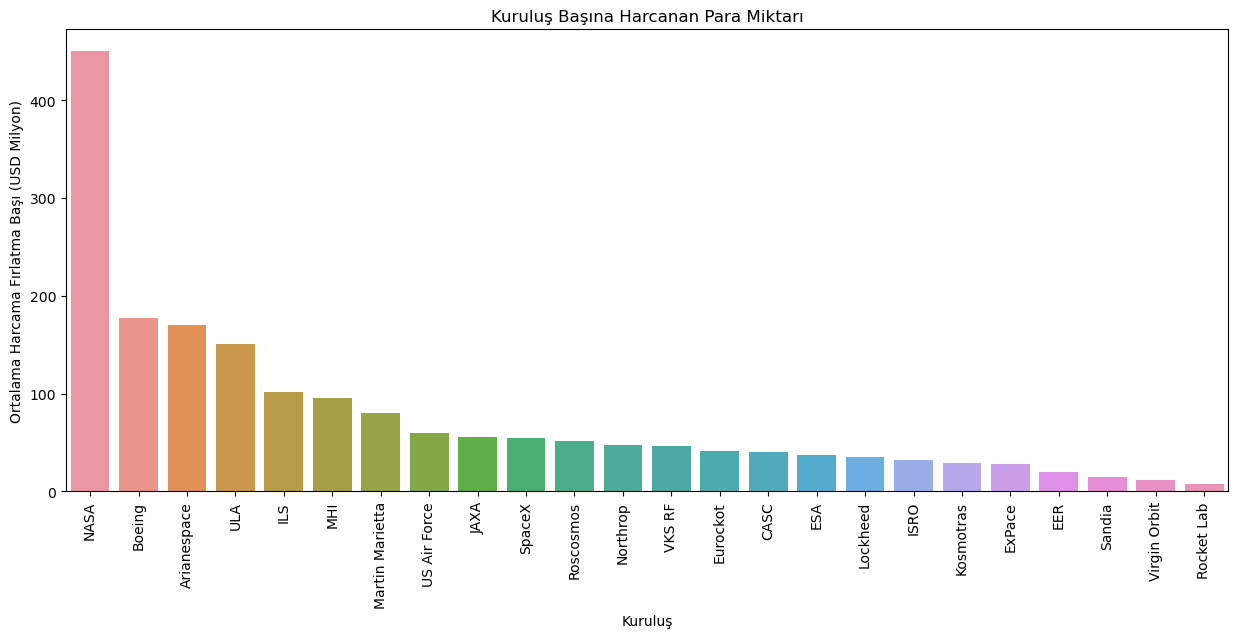

In [63]:
# Kuruluş Başına Harcanan Para Miktarını Analiz Edin
harcanan_para_fırlatma_başı = df_veri.groupby('Organisation')['Price'].mean().sort_values(ascending=False).reset_index()
harcanan_para_fırlatma_başı.columns = ['Kuruluş', 'Ortalama Harcama Fırlatma Başı (USD Milyon)']

plt.figure(figsize=(15, 6))
sns.barplot(x='Kuruluş', y='Ortalama Harcama Fırlatma Başı (USD Milyon)', data=harcanan_para_fırlatma_başı)
plt.xticks(rotation=90)
plt.title('Kuruluş Başına Harcanan Para Miktarı')
plt.xlabel('Kuruluş')
plt.ylabel('Ortalama Harcama Fırlatma Başı (USD Milyon)')
plt.show()

C:\Users\ibrra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\ibrra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



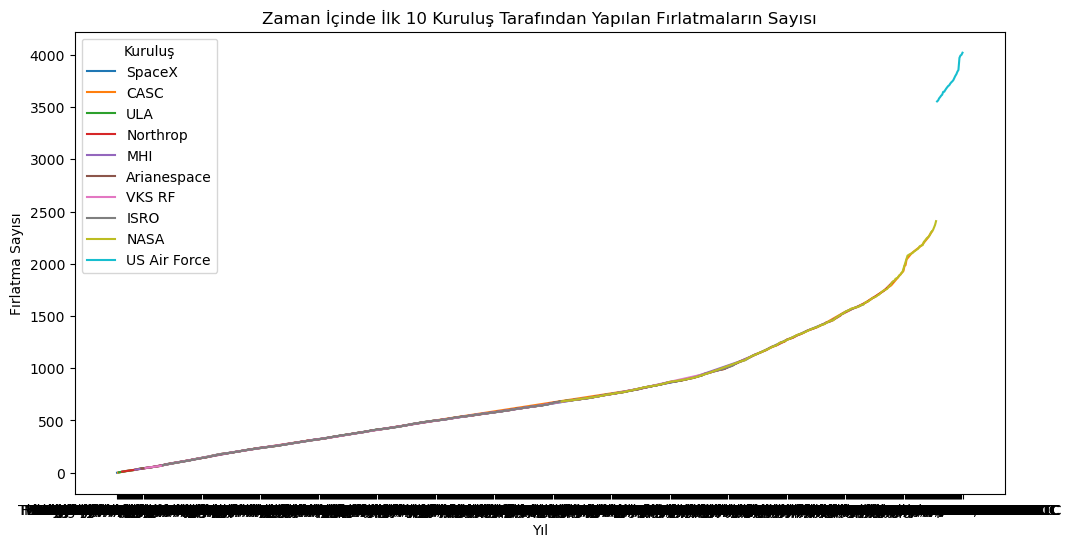

In [64]:
# Zaman İçinde İlk 10 Kuruluş Tarafından Yapılan Fırlatmaların Sayısı
top_10_kuruluşlar = df_veri['Organisation'].value_counts().nlargest(10).index
df_top_10 = df_veri[df_veri['Organisation'].isin(top_10_kuruluşlar)]

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Unnamed: 0', hue='Organisation', data=df_top_10)
plt.title('Zaman İçinde İlk 10 Kuruluş Tarafından Yapılan Fırlatmaların Sayısı')
plt.xlabel('Yıl')
plt.ylabel('Fırlatma Sayısı')
plt.legend(title='Kuruluş')
plt.show()

In [65]:
# Makine Öğrenimi Modeli İçin Veri Hazırlığı
# Özellikleri ve hedef değişkeni seç
X = df_veri[['Rocket_Status', 'Price']]  # Örnek özellikler, gerektiğinde değiştir
y = df_veri['Mission_Status']  # Hedef değişken

In [66]:
# Kategorik değişkenleri sayısal forma dönüştür (gerekiyorsa)
X = pd.get_dummies(X)

In [67]:
# Eğitim ve test veri setlerini ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# NaN değerleri doldurma
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [69]:
# Makine öğrenimi modelini oluştur ve eğit
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [70]:
# Modeli test veri setiyle değerlendir
y_pred = model.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score

# Test seti üzerinde modelin doğruluğunu hesapla
accuracy = accuracy_score(y_test, y_pred)
print(f"Modelin doğruluğu: {accuracy:.2f}")


Modelin doğruluğu: 0.96


In [73]:
# Performans değerlendirmesi: Confusion matrix ve classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[  1   0   5]
 [  0   0   3]
 [  0   0 181]]

Classification Report:
                 precision    recall  f1-score   support

        Failure       1.00      0.17      0.29         6
Partial Failure       0.00      0.00      0.00         3
        Success       0.96      1.00      0.98       181

       accuracy                           0.96       190
      macro avg       0.65      0.39      0.42       190
   weighted avg       0.94      0.96      0.94       190



C:\Users\ibrra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ibrra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ibrra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

